In [1]:
import glob
import gym
import os
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from ribs.archives import GridArchive
from ribs.visualize import grid_archive_heatmap
from tqdm import tqdm

In [2]:
results_dir = '/home/andresf/workspace/CPSC-532J-NeverEndingRL/results/'

archive_dirs = sorted(glob.glob(f'{results_dir}/*'))

num_params = 4996

gen_values = []
obj_avg_values = []
obj_max_values = []
siz_values = []
agg_values = []
enc_values = []

for archive_idx, archive_dir in enumerate(archive_dirs):
    for generation_idx, generation_value in enumerate(range(25, 1001, 25)):
        df = pd.read_pickle(os.path.join(archive_dir, f'archive_{generation_value:04d}.pkl'))
        solutions = df.loc[:, [f'solution_{idx}' for idx in range(num_params)]].to_numpy(copy=True)
        enc = archive_dir.split('/')[6].split('_')[0].split('-')
        if enc[0] == 'MAP':
            encoding_method = 'MAP-Elites'
        elif enc[0] =='AURORA':
            if enc[1] == 'PRE':
                if len(enc) == 4:
                    encoding_method = enc[0] + '-' + enc[3] + ' Pretrained'
                elif len(enc) == 5:
                    encoding_method = enc[0] + '-' + enc[3] + '-' + enc[4] + ' Pretrained'
                else:
                    encoding_method = '-'.join(enc)
            elif enc[1] == 'INC':
                encoding_method = enc[0] + '-' + enc[3] + ' Incremental'
            else:
                encoding_method = '-'.join(enc)
        else:
            encoding_method = '-'.join(enc)
        gen_values.append(generation_value)
        obj_avg_values.append(df.loc[:, 'objective'].to_numpy().mean())
        obj_max_values.append(df.loc[:, 'objective'].to_numpy().max())
        siz_values.append(df.shape[0])
        agg_values.append('-'.join(enc))
        enc_values.append(encoding_method)

In [3]:
archive_df = pd.DataFrame(data={'generation': gen_values,
                                'size': siz_values,
                                'obj_avg': obj_avg_values,
                                'obj_max': obj_max_values,
                                'aggregation': agg_values,
                                'encoding': enc_values})

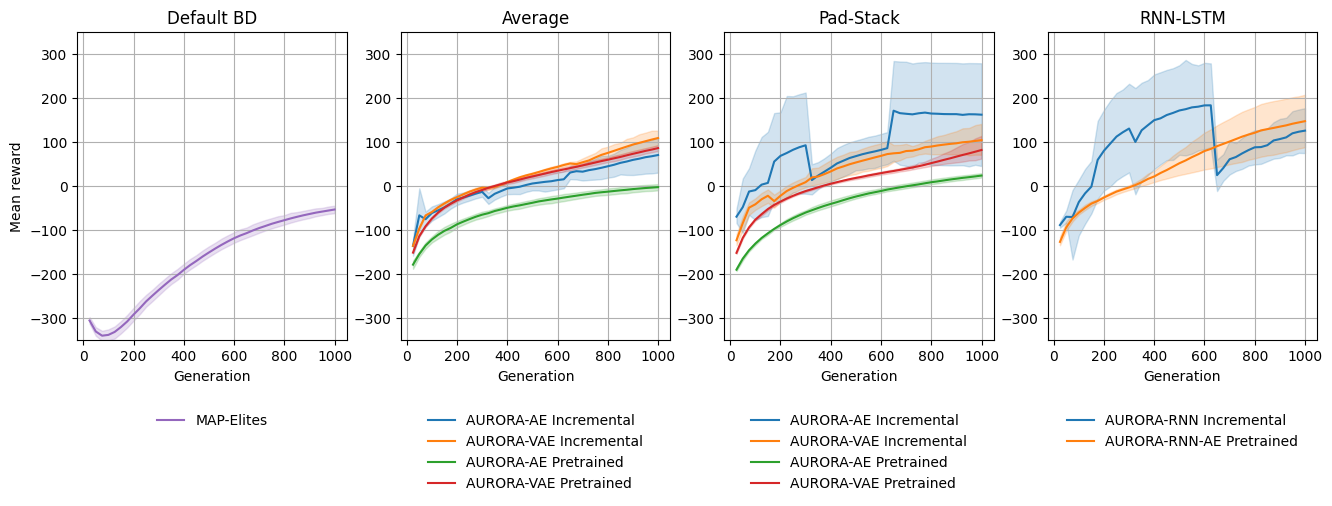

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(4 * 4, 4))

sns.lineplot(data=archive_df.query('aggregation.str.contains("MAP-ELITES")'), x='generation', y='obj_avg', hue='encoding', ax=axes[0], palette=[sns.color_palette("tab10")[4]])
sns.move_legend(
    axes[0], "upper center",
    bbox_to_anchor=(0.5, -0.2), ncol=1, title=None, frameon=False,
)
axes[0].grid()
axes[0].set_xlabel('Generation')
axes[0].set_ylabel('Mean reward')
axes[0].set_ylim(-350, 350)
axes[0].set_title('Default BD')

sns.lineplot(data=archive_df.query('aggregation.str.contains("AVG")'), x='generation', y='obj_avg', hue='encoding', ax=axes[1])
sns.move_legend(
    axes[1], "upper center",
    bbox_to_anchor=(0.5, -0.2), ncol=1, title=None, frameon=False,
)
axes[1].grid()
axes[1].set_xlabel('Generation')
axes[1].set_ylabel(None)
axes[1].set_ylim(-350, 350)
axes[1].set_title('Average')

sns.lineplot(data=archive_df.query('aggregation.str.contains("STACK")'), x='generation', y='obj_avg', hue='encoding', ax=axes[2])
sns.move_legend(
    axes[2], "upper center",
    bbox_to_anchor=(0.5, -0.2), ncol=1, title=None, frameon=False,
)
axes[2].grid()
axes[2].set_xlabel('Generation')
axes[2].set_ylabel(None)
axes[2].set_ylim(-350, 350)
axes[2].set_title('Pad-Stack')

sns.lineplot(data=archive_df.query('aggregation.str.contains("PAD")'), x='generation', y='obj_avg', hue='encoding', ax=axes[3])
sns.move_legend(
    axes[3], "upper center",
    bbox_to_anchor=(0.5, -0.2), ncol=1, title=None, frameon=False,
)
axes[3].grid()
axes[3].set_xlabel('Generation')
axes[3].set_ylabel(None)
axes[3].set_ylim(-350, 350)
axes[3].set_title('RNN-LSTM')

plt.show()

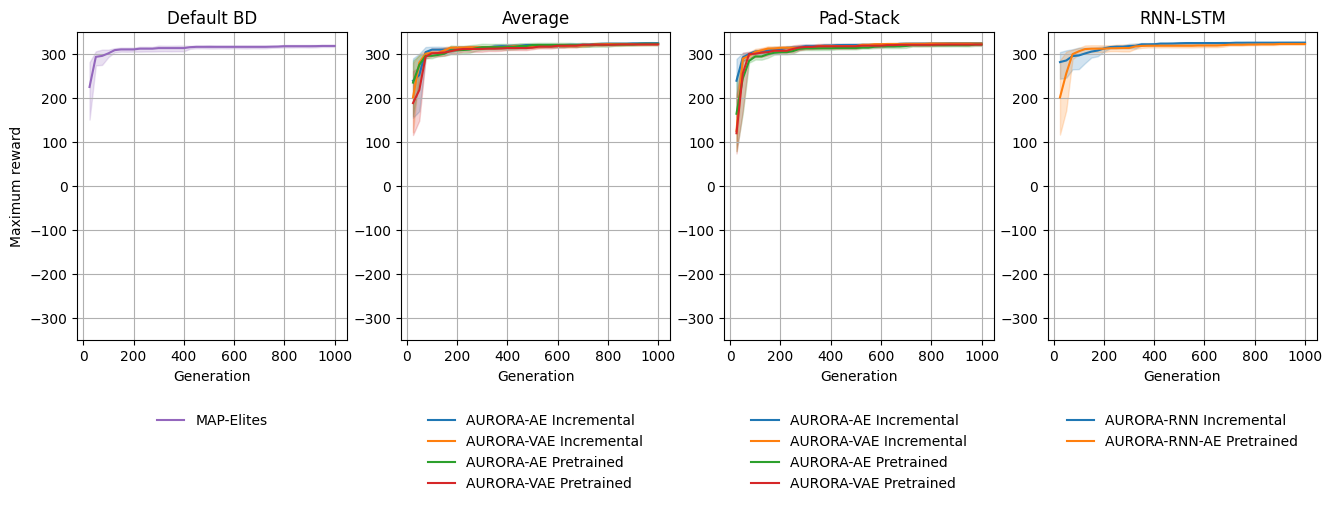

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(4 * 4, 4))

sns.lineplot(data=archive_df.query('aggregation.str.contains("MAP-ELITES")'), x='generation', y='obj_max', hue='encoding', ax=axes[0], palette=[sns.color_palette("tab10")[4]])
sns.move_legend(
    axes[0], "upper center",
    bbox_to_anchor=(0.5, -0.2), ncol=1, title=None, frameon=False,
)
axes[0].grid()
axes[0].set_xlabel('Generation')
axes[0].set_ylabel('Maximum reward')
axes[0].set_ylim(-350, 350)
axes[0].set_title('Default BD')

sns.lineplot(data=archive_df.query('aggregation.str.contains("AVG")'), x='generation', y='obj_max', hue='encoding', ax=axes[1])
sns.move_legend(
    axes[1], "upper center",
    bbox_to_anchor=(0.5, -0.2), ncol=1, title=None, frameon=False,
)
axes[1].grid()
axes[1].set_xlabel('Generation')
axes[1].set_ylabel(None)
axes[1].set_ylim(-350, 350)
axes[1].set_title('Average')

sns.lineplot(data=archive_df.query('aggregation.str.contains("STACK")'), x='generation', y='obj_max', hue='encoding', ax=axes[2])
sns.move_legend(
    axes[2], "upper center",
    bbox_to_anchor=(0.5, -0.2), ncol=1, title=None, frameon=False,
)
axes[2].grid()
axes[2].set_xlabel('Generation')
axes[2].set_ylabel(None)
axes[2].set_ylim(-350, 350)
axes[2].set_title('Pad-Stack')

sns.lineplot(data=archive_df.query('aggregation.str.contains("PAD")'), x='generation', y='obj_max', hue='encoding', ax=axes[3])
sns.move_legend(
    axes[3], "upper center",
    bbox_to_anchor=(0.5, -0.2), ncol=1, title=None, frameon=False,
)
axes[3].grid()
axes[3].set_xlabel('Generation')
axes[3].set_ylabel(None)
axes[3].set_ylim(-350, 350)
axes[3].set_title('RNN-LSTM')

plt.show()